<a href="https://colab.research.google.com/github/Ramya1410/StockMarketAnalysis/blob/main/StockMarketAnalysis_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* importing datetime to specify start and end date.

In [ ]:
import pandas_datareader.data as pdr
import datetime
import pandas as pd
import os
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
os.getcwd()

'/content'

Let's consider the google's stock market to see how it works and understand a few topics. 


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 993 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


importing yfinance to get data from yahoo finance website.

In [ ]:
import yfinance as yf

Setting start and end date 

In [ ]:
start = datetime.datetime(2018,5,1)
end = datetime.datetime(2022,5,1)

In [ ]:
googl = yf.Ticker("GOOG")
google = googl.history(start = start, end = end)

In [ ]:
google.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-05-01,50.682999,51.923500,50.410500,51.865501,28558000,0,0
2018-05-02,51.404999,52.019451,51.143501,51.219002,32062000,0,0
2018-05-03,50.950001,51.483749,50.314499,51.186001,36302000,0,0
2018-05-04,50.845001,52.425499,50.845001,52.410500,38774000,0,0
2018-05-07,52.461498,53.084000,52.355000,52.739498,29322000,0,0


to convert the date which behaves as the **index** to a separate column, we use the below code.

In [ ]:
google.reset_index(level=0, inplace=True)

In [ ]:
google

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,50.682999,51.923500,50.410500,51.865501,28558000,0,0
1,2018-05-02,51.404999,52.019451,51.143501,51.219002,32062000,0,0
2,2018-05-03,50.950001,51.483749,50.314499,51.186001,36302000,0,0
3,2018-05-04,50.845001,52.425499,50.845001,52.410500,38774000,0,0
4,2018-05-07,52.461498,53.084000,52.355000,52.739498,29322000,0,0
...,...,...,...,...,...,...,...,...
1003,2022-04-25,119.429497,123.278000,118.769249,123.250000,34522000,0,0
1004,2022-04-26,122.750000,122.750000,119.161850,119.505997,49394000,0,0
1005,2022-04-27,114.373001,117.500000,113.124252,115.020500,62238000,0,0
1006,2022-04-28,117.114998,120.438499,115.143898,119.411499,36790000,0,0


In [ ]:
google.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
google.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,50.682999,51.923500,50.410500,51.865501,28558000,0,0
1,2018-05-02,51.404999,52.019451,51.143501,51.219002,32062000,0,0
2,2018-05-03,50.950001,51.483749,50.314499,51.186001,36302000,0,0
3,2018-05-04,50.845001,52.425499,50.845001,52.410500,38774000,0,0
4,2018-05-07,52.461498,53.084000,52.355000,52.739498,29322000,0,0


In [ ]:
google

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,50.682999,51.923500,50.410500,51.865501,28558000,0,0
1,2018-05-02,51.404999,52.019451,51.143501,51.219002,32062000,0,0
2,2018-05-03,50.950001,51.483749,50.314499,51.186001,36302000,0,0
3,2018-05-04,50.845001,52.425499,50.845001,52.410500,38774000,0,0
4,2018-05-07,52.461498,53.084000,52.355000,52.739498,29322000,0,0
...,...,...,...,...,...,...,...,...
1003,2022-04-25,119.429497,123.278000,118.769249,123.250000,34522000,0,0
1004,2022-04-26,122.750000,122.750000,119.161850,119.505997,49394000,0,0
1005,2022-04-27,114.373001,117.500000,113.124252,115.020500,62238000,0,0
1006,2022-04-28,117.114998,120.438499,115.143898,119.411499,36790000,0,0


In [ ]:
google['Open']

0        50.682999
1        51.404999
2        50.950001
3        50.845001
4        52.461498
           ...    
1003    119.429497
1004    122.750000
1005    114.373001
1006    117.114998
1007    117.578003
Name: Open, Length: 1008, dtype: float64

Let us visualize the open price of the google stock.

In [ ]:
import matplotlib.pyplot as plt

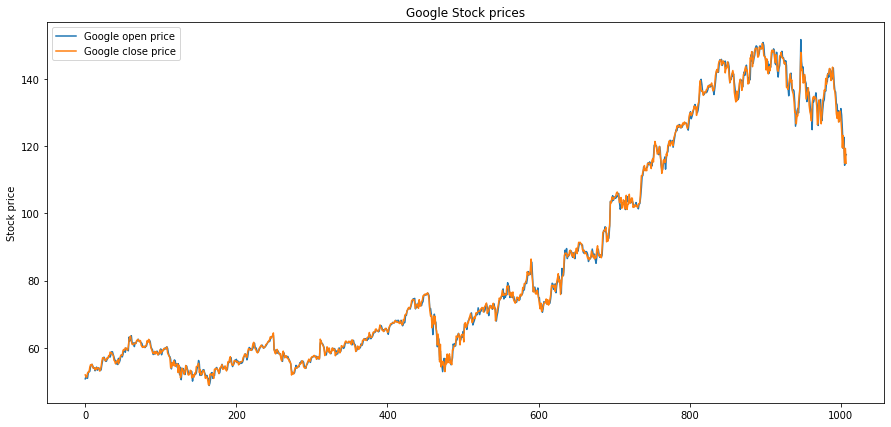

In [ ]:
google['Open'].plot(label='Google open price',figsize=(15,7))
google['Close'].plot(label='Google close price')
plt.legend()
plt.title('Google Stock prices')
plt.ylabel('Stock price')
plt.show()

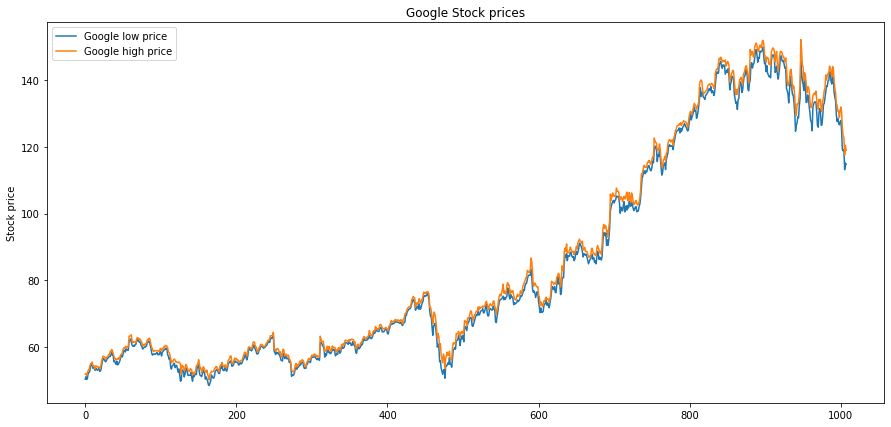

In [ ]:
google['Low'].plot(label='Google low price',figsize=(15,7))
google['High'].plot(label='Google high price')
plt.legend()
plt.title('Google Stock prices')
plt.ylabel('Stock price')
plt.show()

Text(0.5, 1.0, 'Volume Traded by google')

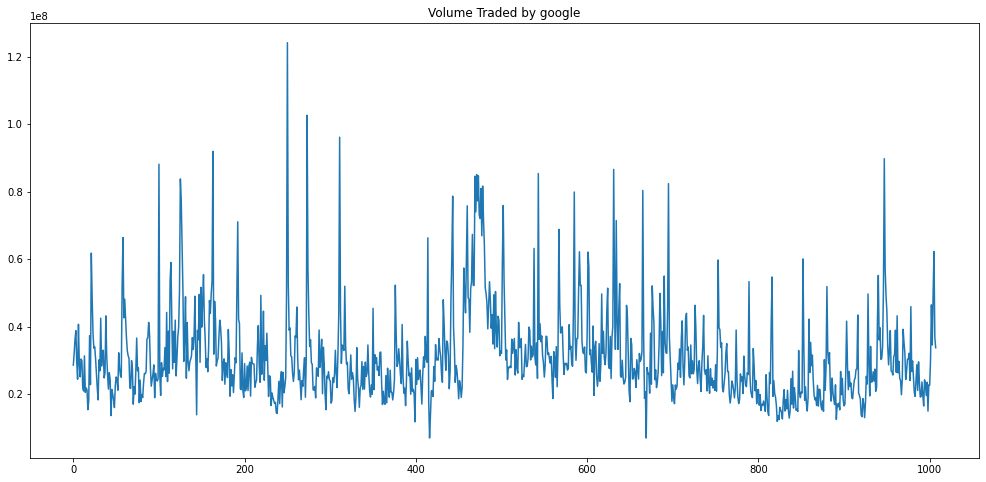

In [ ]:
google['Volume'].plot(figsize=(17,8))
plt.title('Volume Traded by google')

# We will be reading the dataset of stock prices for companies Amazon, Apple and Microsoft to compare them. 

In [ ]:
amazn = yf.Ticker("AMZN")
amazon = amazn.history(start = start, end = end)
amazon.reset_index(level=0, inplace = True)
amazon.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,78.161003,79.250000,77.609001,79.112999,91442000,0,0
1,2018-05-02,79.049004,79.425003,78.318001,78.484001,87206000,0,0
2,2018-05-03,78.000504,78.739998,77.301003,78.603996,85038000,0,0
3,2018-05-04,78.122498,79.245003,78.109497,79.047501,68872000,0,0
4,2018-05-07,79.467003,80.347504,79.391502,80.007004,76038000,0,0


In [ ]:
amazon.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1003,2022-04-25,144.022995,146.221497,142.306503,146.074005,61874000,0,0
1004,2022-04-26,144.800003,144.856003,138.929504,139.391006,77530000,0,0
1005,2022-04-27,140.191498,141.948502,135.783493,138.167007,71336000,0,0
1006,2022-04-28,142.177994,145.937500,140.300003,144.596497,117316000,0,0
1007,2022-04-29,129.848999,130.761002,121.625000,124.281502,272662000,0,0


In [ ]:
amazon.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

here there are no null values to clean.

In [ ]:
appl = yf.Ticker("AAPL")
apple = appl.history(start = start, end = end)
apple.reset_index(level=0, inplace = True)
apple.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,39.786981,40.454041,39.514418,40.430134,214277600,0.0,0.0
1,2018-05-02,41.895772,42.498281,41.553875,42.216156,266157600,0.0,0.0
2,2018-05-03,42.051169,42.438493,41.706878,42.292648,136272800,0.0,0.0
3,2018-05-04,42.617819,44.052360,42.598691,43.951942,224805200,0.0,0.0
4,2018-05-07,44.274703,44.870039,44.171896,44.269924,169805600,0.0,0.0


In [ ]:
apple.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1003,2022-04-25,160.660446,162.704602,158.008044,162.415436,96046400,0.0,0.0
1004,2022-04-26,161.787236,161.876976,156.273010,156.352783,95623200,0.0,0.0
1005,2022-04-27,155.465322,159.334246,154.936835,156.123444,88063200,0.0,0.0
1006,2022-04-28,158.795785,164.050758,158.476691,163.173264,130216800,0.0,0.0
1007,2022-04-29,161.378400,165.725965,156.801495,157.200348,131747600,0.0,0.0


In [ ]:
apple.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
micr = yf.Ticker("MSFT")
micro = micr.history(start = start, end = end)
micro.reset_index(level=0, inplace = True)
micro.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,88.438113,90.411629,88.039616,90.136475,31408900,0.0,0
1,2018-05-02,90.126975,90.297760,88.419131,88.722748,27471000,0.0,0
2,2018-05-03,88.200915,90.070062,87.717023,89.254089,31142500,0.0,0
3,2018-05-04,88.542487,90.487540,88.162963,90.288292,22531300,0.0,0
4,2018-05-07,90.297766,91.758926,90.231350,91.294014,24242000,0.0,0


In [ ]:
micro.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
micro.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1003,2022-04-25,272.077460,279.862741,269.568622,279.474487,35678900,0.0,0
1004,2022-04-26,276.268755,277.124925,268.802032,269.021057,46518400,0.0,0
1005,2022-04-27,280.848384,289.679024,277.921425,281.963409,63477700,0.0,0
1006,2022-04-28,283.924668,289.688987,280.211206,288.344971,33646600,0.0,0
1007,2022-04-29,287.329457,288.593842,275.273202,276.288666,37073900,0.0,0


Let us compare the open stock prices of these 4 comapnies.

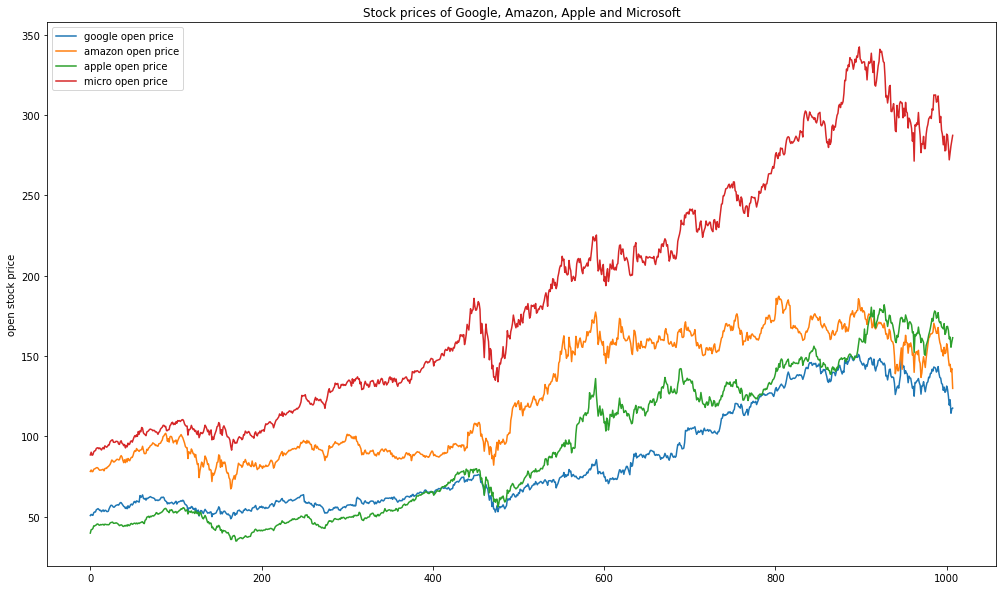

In [ ]:
google['Open'].plot(label = 'google open price',figsize = (17,10))
amazon['Open'].plot(label = 'amazon open price')
apple['Open'].plot(label = 'apple open price')
micro['Open'].plot(label = 'micro open price')
plt.legend()
plt.ylabel('open stock price')
plt.title('Stock prices of Google, Amazon, Apple and Microsoft')
plt.show()

Let us compare the volume of these 3 comapnies.

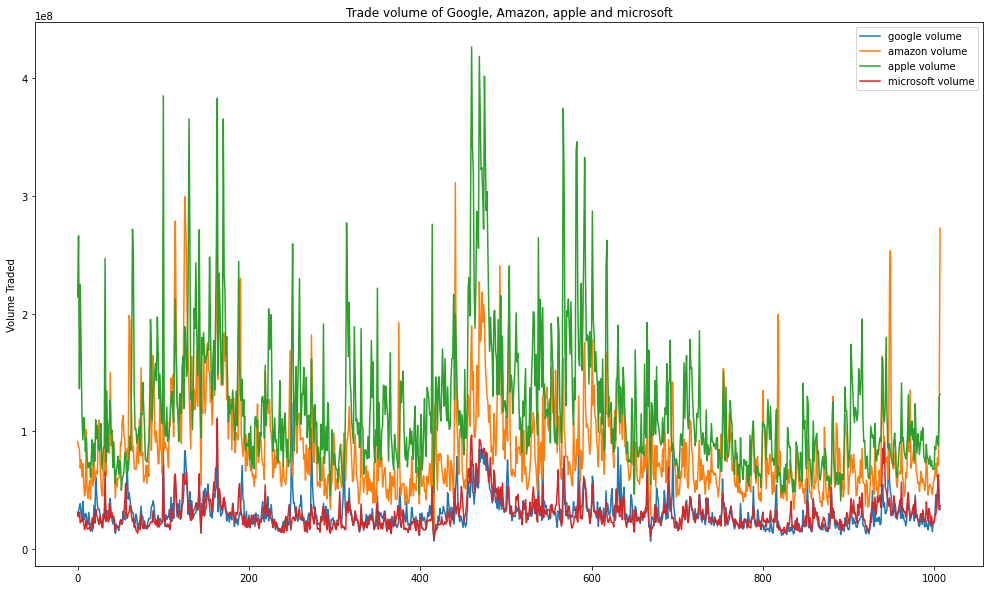

In [ ]:
google['Volume'].plot(label = 'google volume',figsize = (17,10))
amazon['Volume'].plot(label = 'amazon volume')
apple['Volume'].plot(label = 'apple volume')
micro['Volume'].plot(label = 'microsoft volume')
plt.legend()
plt.ylabel('Volume Traded')
plt.title('Trade volume of Google, Amazon, apple and microsoft')
plt.show()

Let us get the position in the graph where the 'volume' is maximum.

In [ ]:
amazon['Volume'].argmax()

441

let us get all the details of stock price when the volume was maximum.

In [ ]:
amazon.iloc[[amazon['Volume'].argmax()]]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
441,2020-01-31,102.573502,102.786003,100.113503,100.435997,311346000,0,0


In [ ]:
amazon.iloc[[amazon['Open'].min()]]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
67,2018-08-06,91.290497,92.388496,90.945999,92.387497,67836000,0,0


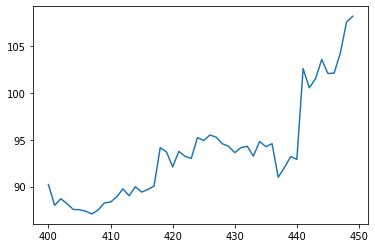

In [ ]:
amazon.iloc[400:450]['Open'].plot()

In the above two plots, we can observe that when the share open prices dropped, then the volume increased a lot. This is a trick companies use to make more money. See april 2022

if we see the plot of the stock prices of the 3 companies, it looks like amazon has been doing well all along. but this can be misleading. so, forbetter vision, we consider market cap of the comapany and not just the stock prices.

since we do not have an actual column for 'Market capitalization', we can perform calculation just for the visualization.


we use open price and volume. We do the product of the stock open price and the volume traded to represent the total money traded.
This is not the actual market cap. It's just used for the visualization of the toal money traded during the time series.

-----------------000000000000000-------------------000000000000------------------------------------


# Declaring the data once again just to calculate market cap.

In [ ]:
googl = yf.Ticker("GOOG")
google2 = googl.history(start = start, end = end)
google2.reset_index(level=0, inplace = True)
google2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,50.682999,51.923500,50.410500,51.865501,28558000,0,0
1,2018-05-02,51.404999,52.019451,51.143501,51.219002,32062000,0,0
2,2018-05-03,50.950001,51.483749,50.314499,51.186001,36302000,0,0
3,2018-05-04,50.845001,52.425499,50.845001,52.410500,38774000,0,0
4,2018-05-07,52.461498,53.084000,52.355000,52.739498,29322000,0,0


In [ ]:
amzn = yf.Ticker("AMZN")
amazon2 = amzn.history(start = start, end = end)
amazon2.reset_index(level=0, inplace = True)
amazon2.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,78.161003,79.250000,77.609001,79.112999,91442000,0,0
1,2018-05-02,79.049004,79.425003,78.318001,78.484001,87206000,0,0
2,2018-05-03,78.000504,78.739998,77.301003,78.603996,85038000,0,0
3,2018-05-04,78.122498,79.245003,78.109497,79.047501,68872000,0,0
4,2018-05-07,79.467003,80.347504,79.391502,80.007004,76038000,0,0


In [ ]:
appl = yf.Ticker("AAPL")
apple2 = appl.history(start = start, end = end)
apple2.reset_index(level=0, inplace=True)
apple2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,39.786992,40.454052,39.514430,40.430145,214277600,0.0,0.0
1,2018-05-02,41.895765,42.498273,41.553868,42.216148,266157600,0.0,0.0
2,2018-05-03,42.051169,42.438493,41.706878,42.292648,136272800,0.0,0.0
3,2018-05-04,42.617815,44.052356,42.598688,43.951939,224805200,0.0,0.0
4,2018-05-07,44.274707,44.870043,44.171900,44.269928,169805600,0.0,0.0


In [ ]:
micr = yf.Ticker("MSFT")
micro2 = micr.history(start = start, end = end)
micro2.reset_index(level=0, inplace=True)
micro2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-05-01,88.438113,90.411629,88.039616,90.136475,31408900,0.0,0
1,2018-05-02,90.126975,90.297760,88.419131,88.722748,27471000,0.0,0
2,2018-05-03,88.200900,90.070047,87.717008,89.254074,31142500,0.0,0
3,2018-05-04,88.542479,90.487532,88.162956,90.288284,22531300,0.0,0
4,2018-05-07,90.297758,91.758919,90.231342,91.294006,24242000,0.0,0


In [ ]:
amazon2['total traded']= amazon2['Open']*amazon2['Volume']
google2['total traded']= google2['Open']*google2['Volume']
apple2['total traded']= apple2['Open']*apple2['Volume']
micro2['total traded']= micro2['Open']*micro2['Volume']

In [ ]:
google2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,total traded
0,2018-05-01,50.682999,51.923500,50.410500,51.865501,28558000,0,0,1.447405e+09
1,2018-05-02,51.404999,52.019451,51.143501,51.219002,32062000,0,0,1.648147e+09
2,2018-05-03,50.950001,51.483749,50.314499,51.186001,36302000,0,0,1.849587e+09
3,2018-05-04,50.845001,52.425499,50.845001,52.410500,38774000,0,0,1.971464e+09
4,2018-05-07,52.461498,53.084000,52.355000,52.739498,29322000,0,0,1.538276e+09


In [ ]:
amazon2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,total traded
0,2018-05-01,78.161003,79.250000,77.609001,79.112999,91442000,0,0,7.147198e+09
1,2018-05-02,79.049004,79.425003,78.318001,78.484001,87206000,0,0,6.893547e+09
2,2018-05-03,78.000504,78.739998,77.301003,78.603996,85038000,0,0,6.633007e+09
3,2018-05-04,78.122498,79.245003,78.109497,79.047501,68872000,0,0,5.380453e+09
4,2018-05-07,79.467003,80.347504,79.391502,80.007004,76038000,0,0,6.042512e+09


In [ ]:
apple2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,total traded
0,2018-05-01,39.786992,40.454052,39.514430,40.430145,214277600,0.0,0.0,8.525461e+09
1,2018-05-02,41.895765,42.498273,41.553868,42.216148,266157600,0.0,0.0,1.115088e+10
2,2018-05-03,42.051169,42.438493,41.706878,42.292648,136272800,0.0,0.0,5.730430e+09
3,2018-05-04,42.617815,44.052356,42.598688,43.951939,224805200,0.0,0.0,9.580706e+09
4,2018-05-07,44.274707,44.870043,44.171900,44.269928,169805600,0.0,0.0,7.518093e+09


In [ ]:
micro2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,total traded
0,2018-05-01,88.438113,90.411629,88.039616,90.136475,31408900,0.0,0,2.777744e+09
1,2018-05-02,90.126975,90.297760,88.419131,88.722748,27471000,0.0,0,2.475878e+09
2,2018-05-03,88.200900,90.070047,87.717008,89.254074,31142500,0.0,0,2.746797e+09
3,2018-05-04,88.542479,90.487532,88.162956,90.288284,22531300,0.0,0,1.994977e+09
4,2018-05-07,90.297758,91.758919,90.231342,91.294006,24242000,0.0,0,2.188998e+09


Text(0, 0.5, 'total traded')

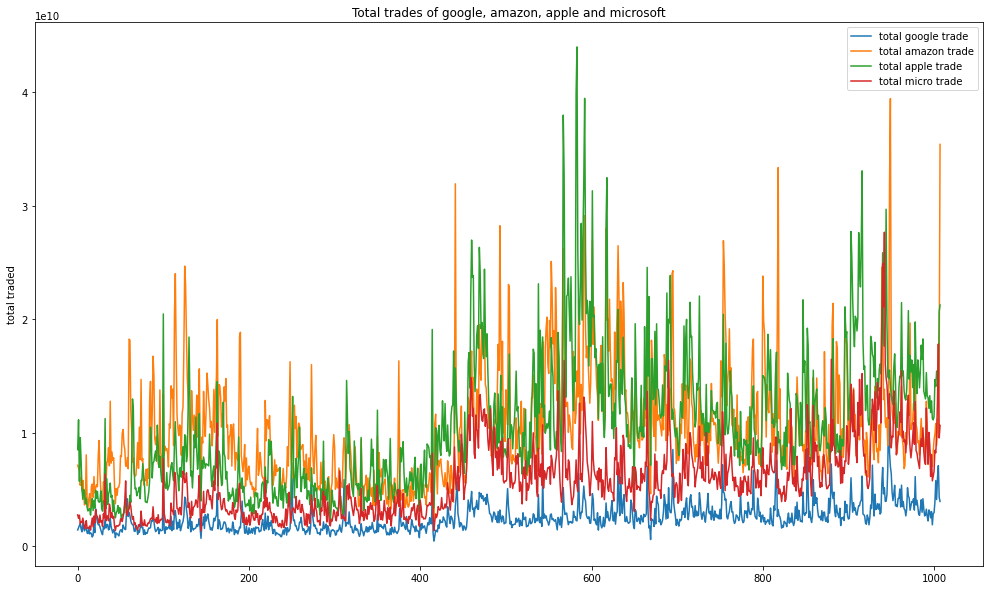

In [ ]:
google2['total traded'].plot(label='total google trade',figsize=(17,10))
amazon2['total traded'].plot(label='total amazon trade')
apple2['total traded'].plot(label='total apple trade')
micro2['total traded'].plot(label='total micro trade')
plt.legend()
plt.title('Total trades of google, amazon, apple and microsoft')
plt.ylabel('total traded')


In [ ]:
apple2['total traded'].argmax()

583

In [ ]:
amazon2['total traded'].argmax()

949

In [ ]:
apple2.iloc[[apple2['total traded'].argmax()]]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,total traded
583,2020-08-24,127.162461,127.248926,122.459241,124.356339,345937600,0.0,0.0,4.399028e+10


In [ ]:
amazon2.iloc[[amazon2['total traded'].argmax()]]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,total traded
949,2022-02-04,155.606506,161.199997,150.608002,157.639496,253456000,0,0,3.943940e+10


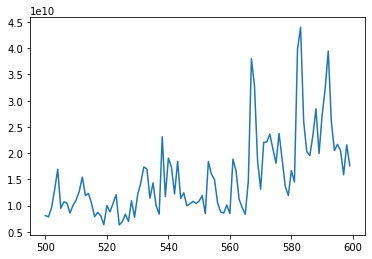

In [ ]:
apple2.iloc[500:600]['total traded'].plot()

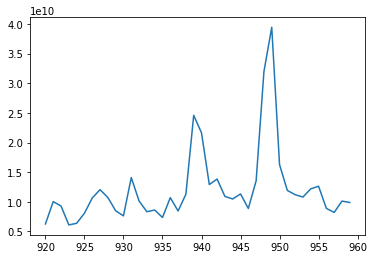

In [ ]:
amazon2.iloc[920:960]['total traded'].plot()

in the above 2 plots, we can see that the graph and the range at which max occurs match.

----------------0000000000000-----------------------0000000000000000-------------------

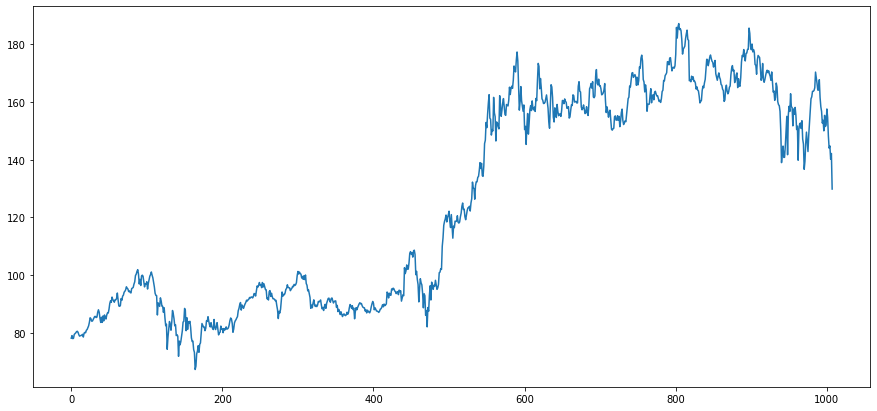

In [ ]:
amazon['Open'].plot(figsize=(15,7))

let us consider the graph for when the open price is max.

In [ ]:
amazon['Open'].argmax()

804

In [ ]:
amazon.iloc[[amazon['Open'].argmax()]]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
804,2021-07-12,187.199997,187.864502,184.839493,185.927505,51432000,0,0


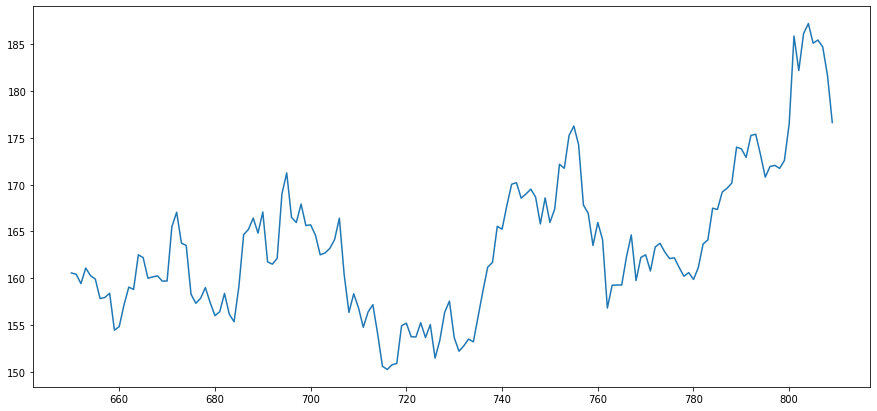

In [ ]:
amazon['Open'].iloc[650:810].plot(figsize=(15,7))

here we can see that the graph is very noisy. it gets harder to analyse the stock prices. the data might not be reliable given a short observation window.
This is where the concept of **moving average** comes in.


moving average is a classical smoothing method in time series that makes the data more reliable, more robust against noise.

* Let us create a new column for moving average with a fixed set of samples, i.e for 10 dates in this case.
* we use the rolling() function to perform this. Its sometimes also called sliding a window of a certain size through that feature. 

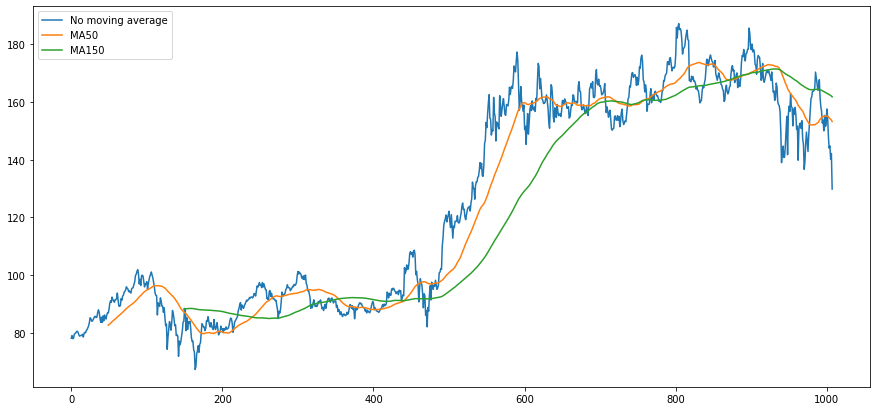

In [ ]:
amazon['Open'].plot(figsize=(15,7),label='No moving average')
amazon['MA50']= amazon['Open'].rolling(50).mean()
amazon['MA50'].plot(label = 'MA50')
amazon['MA150']= amazon['Open'].rolling(150).mean()
amazon['MA150'].plot(label = 'MA150')
plt.legend()

* from the above plot, we can that the yellow line, when the moving average size is 10, the line is smooth and it compensates for all the noise.
* but, if the moving average window size is too high, you might miss out some trends.
* there are many other ways to study the trends of stock prices. We can use auto regression, a combination of auto regression adn moving avg, there's ACF(auto correlation function), EWMA(exponentially weighted moving average), etc..

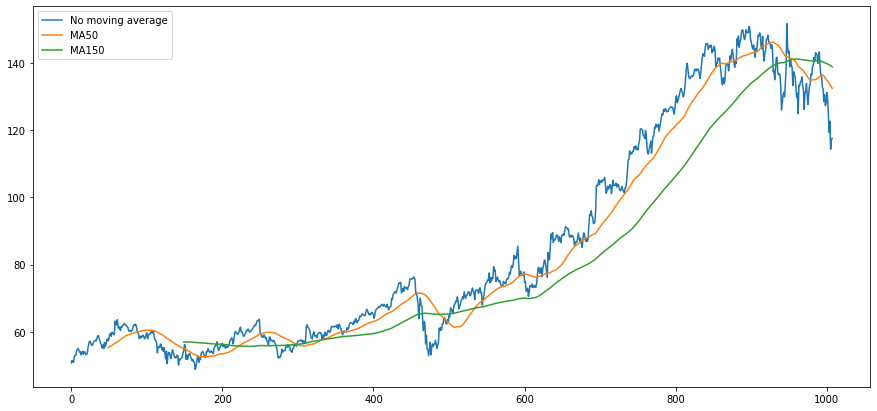

In [ ]:
google['Open'].plot(figsize=(15,7),label='No moving average')
google['MA50']= google['Open'].rolling(50).mean()
google['MA50'].plot(label = 'MA50')
google['MA150']= google['Open'].rolling(150).mean()
google['MA150'].plot(label = 'MA150')
plt.legend()

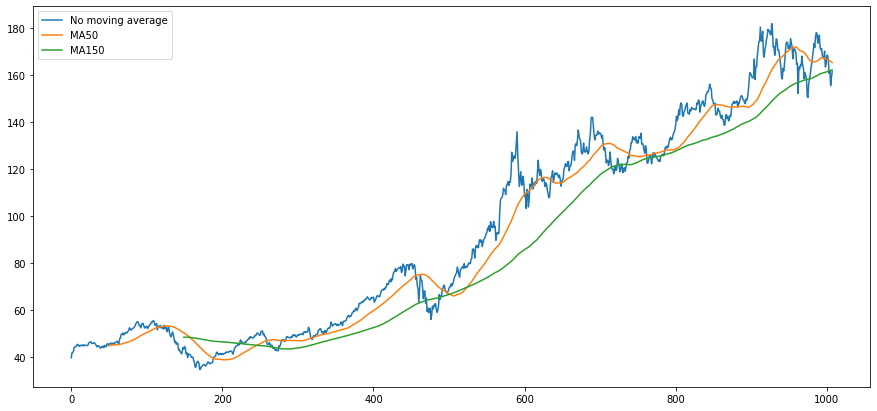

In [ ]:
apple['Open'].plot(figsize=(15,7),label='No moving average')
apple['MA50']= apple['Open'].rolling(50).mean()
apple['MA50'].plot(label = 'MA50')
apple['MA150']= apple['Open'].rolling(150).mean()
apple['MA150'].plot(label = 'MA150')
plt.legend()

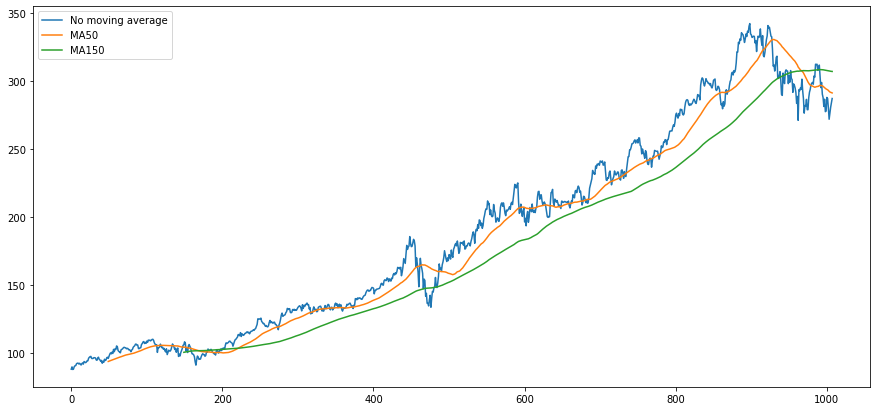

In [ ]:
micro['Open'].plot(figsize=(15,7),label='No moving average')
micro['MA50']= micro['Open'].rolling(50).mean()
micro['MA50'].plot(label = 'MA50')
micro['MA150']= micro['Open'].rolling(150).mean()
micro['MA150'].plot(label = 'MA150')
plt.legend()

# Let us see the correlation between the stocks of the companies. There exist some dependancy that exists between the 3 stocks. 

We'll see this through the scatter matrix plot. 

In [ ]:
from pandas.plotting import scatter_matrix

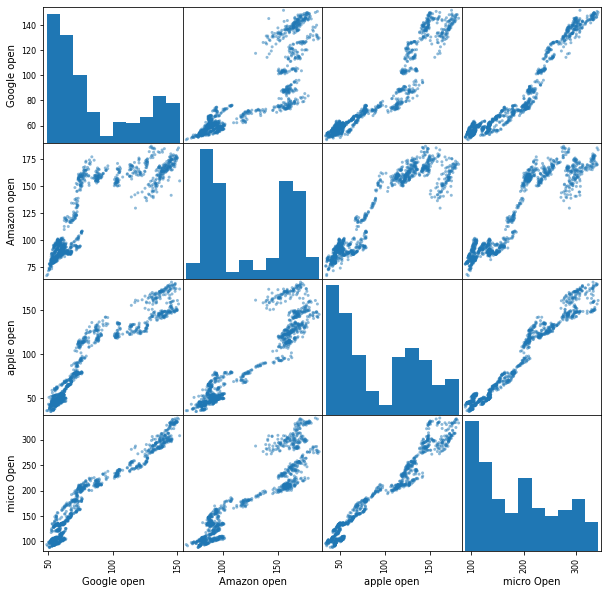

In [ ]:
stocks = pd.concat([google['Open'],amazon['Open'],apple['Open'],micro['Open']],axis = 1)
stocks.columns = ['Google open','Amazon open','apple open','micro Open']
scatter_matrix(stocks,figsize=(10,10))
plt.show()

if we want to show more histogram bins in the graph(histogram), we can use hist_kwds() to do so.

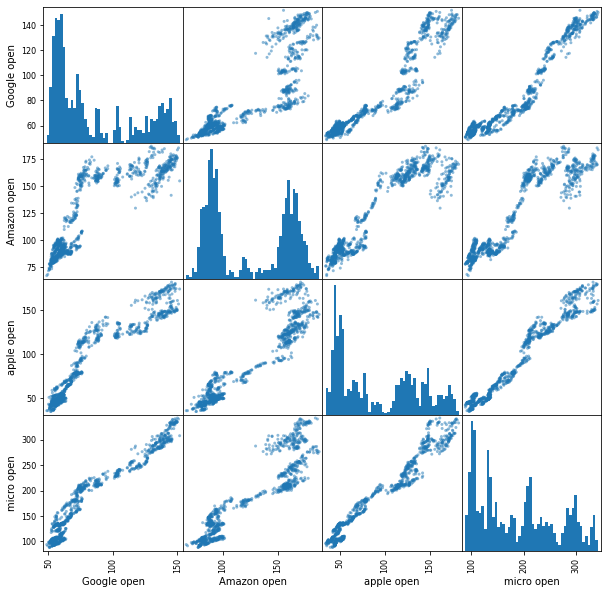

In [ ]:
stocks = pd.concat([google['Open'],amazon['Open'],apple['Open'],micro['Open']],axis = 1)
stocks.columns = ['Google open','Amazon open','apple open','micro open']
scatter_matrix(stocks,figsize=(10,10),hist_kwds= {'bins': 50})
plt.show()

* scatter matrices determine whether there is a linear correlation between 2 or more variables. 
* for ex, we can see that in positions (3,4) and (4,3), we see a positive slope, similar to each other. Since the slope is positive, we can say that there is a positive correlation between the amazon open price and the google open price. 
* Whereas in positions (4,1)and(3,1) we can see that there is a curve in the plot. this means that the graph is non linear and there is no correlation between the two during that time.

# Let us look at a visual representation using candlestick chart. Also known as the japanese candlestick chart.

* Its a style of financial chart used to describe price movements of a certain currency or stock price metric.
* It includes all 4 features of the stock, i.e, the open price, closing price, high and low.
* the top most and the bottom most ends represent the high and low resp.
* the top and the bottom part of a shape that look slike a rectangle represents the open price and closing price resp.
* we can do this by using the MPL finance library. from this library we import the candlestick chart.

In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.4 MB/s 


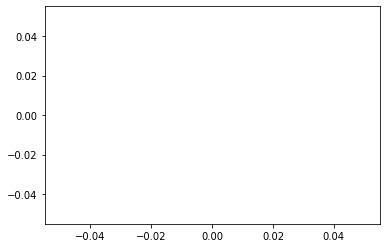

In [ ]:
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

apple_reset = apple.loc['2018-05':'2018-05'].reset_index()

apple_reset['date ax']= apple_reset['Date'].apply(lambda date : date2num(date))
apple_values = [ tuple(vals) for vals in apple_reset[['date ax','Open','High','Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
WeekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots()
candlestick_ohlc(ax, apple_values, width = 0.8, colorup = 'green',colordown='red',alpha = 0.8)
plt.show()

# Daily Percentage Change

* r(t) = [p(t)/P(t-1)]-1
* r(t) which is r subscript t is the return at time t.
* p(t) which is p subscript t is the price at time t.
* p(t-1) which is p subscript t is the price at time t-1.
* the value of r(t) basically reports a percentage gain or loss acc to the scenario.
* for ex, if the value of p(t-1)>p(t), then the fraction is lesser than one. hence the value of r(t) is negative and therefore its a loss.
* if the value of p(t-1)<p(t), then the fraction is greater than one. hence the value of r(t) is positive and therefore its a gain.
* so larger 
* this isn't necessarily helpful for attempting to predict future values of the stock.
* it's very helpful in analyzing the volatility of the stock 
* therfore, if your daily return have a wide distribution, then the stock is more volatile.

now that we have daily percentage change, we can calculate percent returns and plot them on a histogram. based on the histogram, we can decide which stock is the most stable. Stability is very imp to consider. Let's say we want to invest in a company which has stocks that are stable and not volatile. we dont want to take any risk. So, this study can be helpful for this kind of situation.

In [ ]:
google['Daily Return'] = (google['Close']/google['Close'].shift(1))-1
google.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA150,Daily Return
0,2018-05-01,50.682999,51.923500,50.410500,51.865501,28558000,0,0,NaN,NaN,NaN
1,2018-05-02,51.404999,52.019451,51.143501,51.219002,32062000,0,0,NaN,NaN,-0.012465
2,2018-05-03,50.950001,51.483749,50.314499,51.186001,36302000,0,0,NaN,NaN,-0.000644
3,2018-05-04,50.845001,52.425499,50.845001,52.410500,38774000,0,0,NaN,NaN,0.023923
4,2018-05-07,52.461498,53.084000,52.355000,52.739498,29322000,0,0,NaN,NaN,0.006277


the first value is NOT A NUMBER cuz there is no previous value to divide it with.

In [ ]:
amazon['Daily Return'] = (amazon['Close']/amazon['Close'].shift(1))-1
amazon.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA150,Daily Return
0,2018-05-01,78.161003,79.250000,77.609001,79.112999,91442000,0,0,NaN,NaN,NaN
1,2018-05-02,79.049004,79.425003,78.318001,78.484001,87206000,0,0,NaN,NaN,-0.007951
2,2018-05-03,78.000504,78.739998,77.301003,78.603996,85038000,0,0,NaN,NaN,0.001529
3,2018-05-04,78.122498,79.245003,78.109497,79.047501,68872000,0,0,NaN,NaN,0.005642
4,2018-05-07,79.467003,80.347504,79.391502,80.007004,76038000,0,0,NaN,NaN,0.012138


In [ ]:
apple['Daily Return'] = (apple['Close']/apple['Close'].shift(1))-1
apple.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA150,Daily Return
0,2018-05-01,39.786981,40.454041,39.514418,40.430134,214277600,0.0,0.0,NaN,NaN,NaN
1,2018-05-02,41.895772,42.498281,41.553875,42.216156,266157600,0.0,0.0,NaN,NaN,0.044176
2,2018-05-03,42.051169,42.438493,41.706878,42.292648,136272800,0.0,0.0,NaN,NaN,0.001812
3,2018-05-04,42.617819,44.052360,42.598691,43.951942,224805200,0.0,0.0,NaN,NaN,0.039234
4,2018-05-07,44.274703,44.870039,44.171896,44.269924,169805600,0.0,0.0,NaN,NaN,0.007235


In [ ]:
micro['Daily Return'] = (micro['Close']/micro['Close'].shift(1))-1
micro.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA150,Daily Return
0,2018-05-01,88.438113,90.411629,88.039616,90.136475,31408900,0.0,0,NaN,NaN,NaN
1,2018-05-02,90.126975,90.297760,88.419131,88.722748,27471000,0.0,0,NaN,NaN,-0.015684
2,2018-05-03,88.200915,90.070062,87.717023,89.254089,31142500,0.0,0,NaN,NaN,0.005989
3,2018-05-04,88.542487,90.487540,88.162963,90.288292,22531300,0.0,0,NaN,NaN,0.011587
4,2018-05-07,90.297766,91.758926,90.231350,91.294014,24242000,0.0,0,NaN,NaN,0.011139


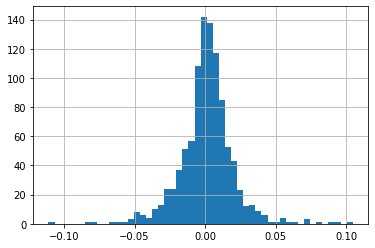

In [ ]:
google['Daily Return'].hist(bins=50)

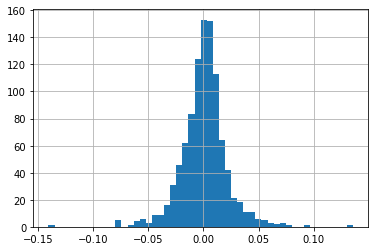

In [ ]:
amazon['Daily Return'].hist(bins=50)

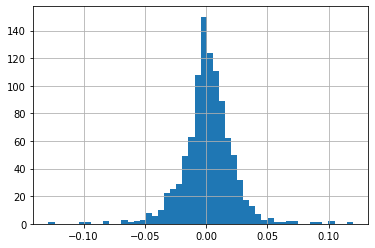

In [ ]:
apple['Daily Return'].hist(bins=50)

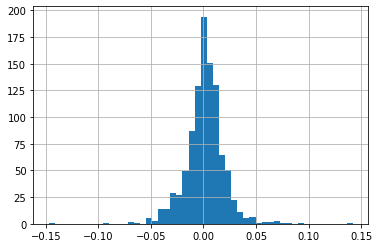

In [ ]:
micro['Daily Return'].hist(bins=50)

In [ ]:
google['Daily Return'].mean()

0.0009662056015147843

In [ ]:
amazon['Daily Return'].mean()

0.0006694113188338161

In [ ]:
apple['Daily Return'].mean()

0.0015684292385203817

In [ ]:
micro['Daily Return'].mean()

0.0012938697352007356

* Here, the wider the bell shaped histogram is, it means the range of SD is more and hence the variance is more as variance = SD^2.
* This means that more the variance, more volatile the stock is.

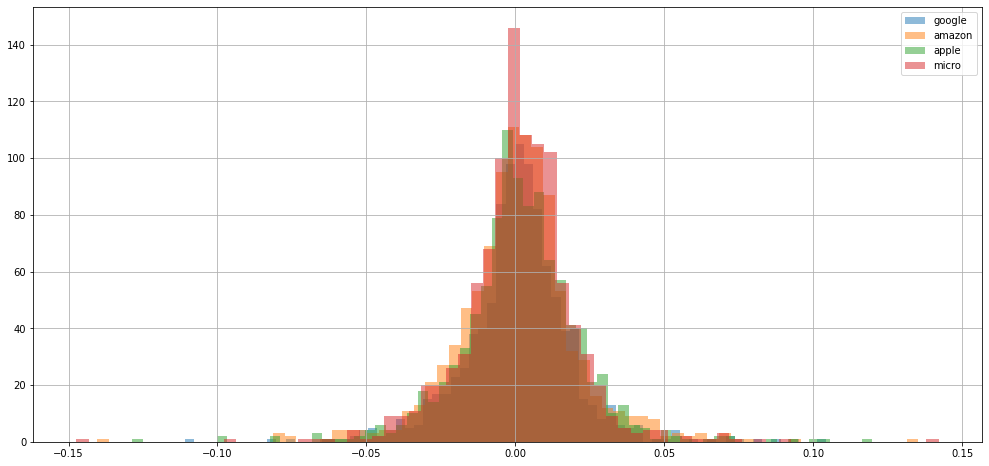

In [ ]:
google['Daily Return'].hist(bins=70,label ='google',figsize=(17,8),alpha = 0.5)
amazon['Daily Return'].hist(bins=70,label = 'amazon',alpha = 0.5)
apple['Daily Return'].hist(bins=70,label='apple',alpha = 0.5)
micro['Daily Return'].hist(bins=70,label='micro',alpha = 0.5)
plt.legend()

we can smoothen the histogram by using the KDE plot(kernel density estimate)

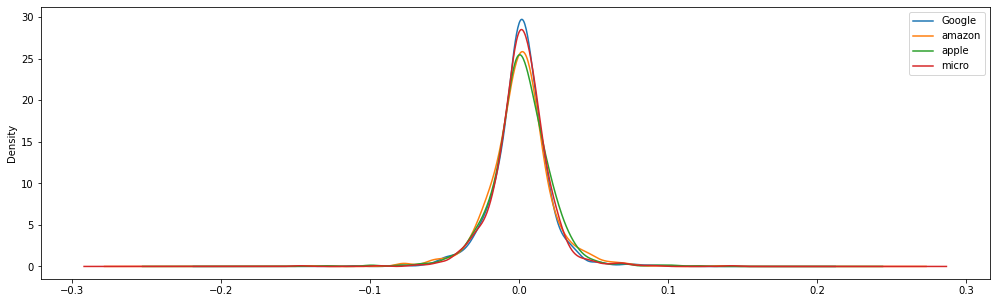

In [ ]:
google['Daily Return'].plot(kind='kde',label='Google',figsize=(17,5))
amazon['Daily Return'].plot(kind='kde',label='amazon')
apple['Daily Return'].plot(kind='kde',label='apple')
micro['Daily Return'].plot(kind='kde',label='micro')
plt.legend()


* now we might wonder that in the histogram, apple is shorter but in the kde plot, it is tall. 
* it is because it is a kernel and it reports towards a certain probability dis function. what we see here is a prob density function.
* the histogram is unnormalized.
* the kde plot is normalized and hence the areas of each and every plot is constant. 
* we shouldn't compare the stocks in the histogram and decide. we need to normalize it. We can see the width of plot of google and tcs are very similar.

# Box plots

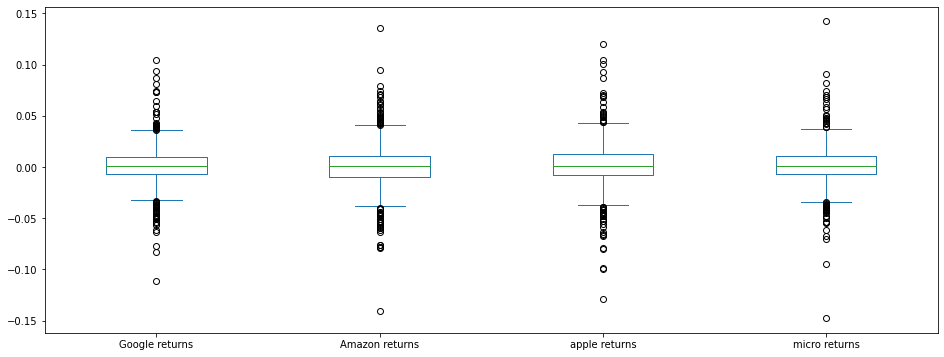

In [ ]:
box_df = pd.concat([google['Daily Return'],amazon['Daily Return'],apple['Daily Return'],micro['Daily Return']],axis=1)
box_df.columns = ['Google returns','Amazon returns','apple returns','micro returns']
box_df.plot(kind='box',figsize=(16,6))

let us use the box_df and see if there is any correlation between the stock's daily returns of the 3 companies. we get to know about the volatility and stability.

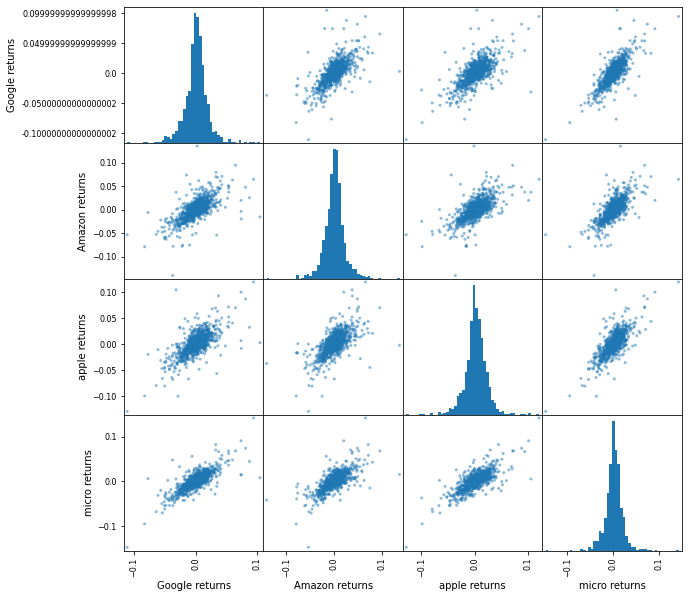

In [ ]:
scatter_matrix(box_df,figsize=(10,10),hist_kwds={'bins':50})
plt.show()

The value of alpha denotes the level of transparency of the scatter plot. close to 0, more transparent.

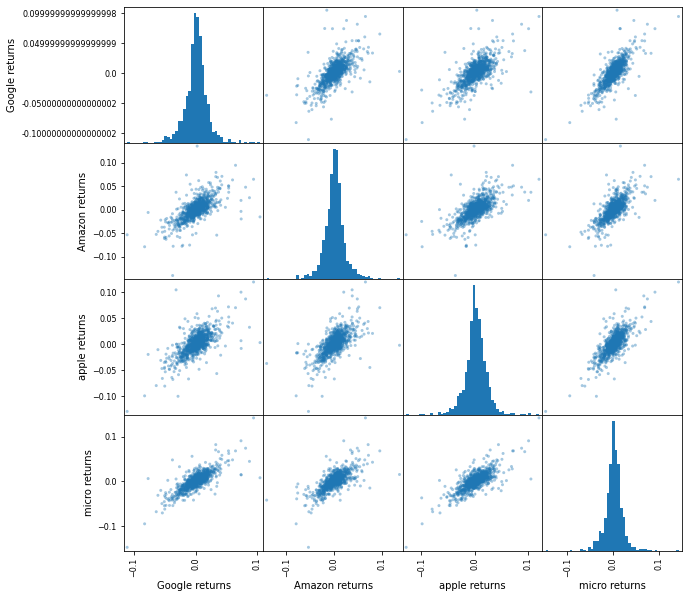

In [ ]:
scatter_matrix(box_df,figsize=(10,10),hist_kwds={'bins':50},alpha = 0.4)
plt.show()

Cumulative return is given by the formula:
i(t) = [1+r(t)]i(t-1)
* its a recursive formula. hence the name.
* if we substitute the value of daily returns, i.e r(t), we get the formula to be {[1+[p(t)/p(t-1)]-1]}*[i(t-1)]
* this becomes [p(t)/p(t-1)]-1]*[i(t-1)]
* this helps us answer the following question. consider that you invested 1 dollar in a company, 5 years ago. after 5 years, now, how much will the price be. 
* this takes into account daily returns for all stocks except the ones that provide/give out dividend. 

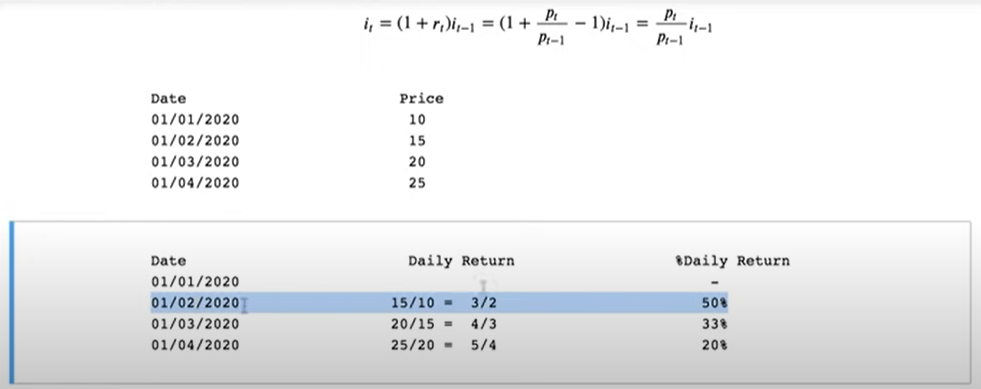

here if we calculate the daily return, we can see how it changes every month.
* 3/2-1=1/2=50%
* 4/3-1=1/3=33%
* the middle row, daily return represents whether its a profit or loss. positive(>1) = profit. negative(<1) = loss.
*  daily returns are used for short term but cumulative are used to get insights for a long term.

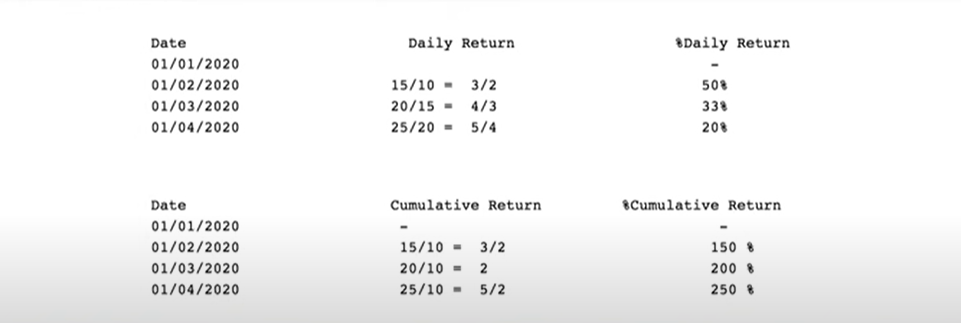

here if we apply [p(t)/p(t-1)]-1]*[i(t-1)] formula for cumulative returns , starting from i = 1, 
the first value remains the same cuz it doesnt have a prev value to compare it to. 
* the second value, (20/15)*(15/10)=20/10=200%
* the third value, (25/20)*(20/10)=25/10=250%

let us compute cumulative return for the 3 companies.


In [ ]:
google['Trend(Cum Return)']=(1+google['Daily Return']).cumprod()
google.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA150,Daily Return,Trend(Cum Return)
0,2018-05-01,50.682999,51.923500,50.410500,51.865501,28558000,0,0,NaN,NaN,NaN,NaN
1,2018-05-02,51.404999,52.019451,51.143501,51.219002,32062000,0,0,NaN,NaN,-0.012465,0.987535
2,2018-05-03,50.950001,51.483749,50.314499,51.186001,36302000,0,0,NaN,NaN,-0.000644,0.986899
3,2018-05-04,50.845001,52.425499,50.845001,52.410500,38774000,0,0,NaN,NaN,0.023923,1.010508
4,2018-05-07,52.461498,53.084000,52.355000,52.739498,29322000,0,0,NaN,NaN,0.006277,1.016851


In [ ]:
amazon['Trend(Cum Return)']=(1+amazon['Daily Return']).cumprod()
amazon.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA150,Daily Return,Trend(Cum Return)
0,2018-05-01,78.161003,79.250000,77.609001,79.112999,91442000,0,0,NaN,NaN,NaN,NaN
1,2018-05-02,79.049004,79.425003,78.318001,78.484001,87206000,0,0,NaN,NaN,-0.007951,0.992049
2,2018-05-03,78.000504,78.739998,77.301003,78.603996,85038000,0,0,NaN,NaN,0.001529,0.993566
3,2018-05-04,78.122498,79.245003,78.109497,79.047501,68872000,0,0,NaN,NaN,0.005642,0.999172
4,2018-05-07,79.467003,80.347504,79.391502,80.007004,76038000,0,0,NaN,NaN,0.012138,1.011300


In [ ]:
apple['Trend(Cum Return)']=(1+apple['Daily Return']).cumprod()
apple.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA150,Daily Return,Trend(Cum Return)
0,2018-05-01,39.786981,40.454041,39.514418,40.430134,214277600,0.0,0.0,NaN,NaN,NaN,NaN
1,2018-05-02,41.895772,42.498281,41.553875,42.216156,266157600,0.0,0.0,NaN,NaN,0.044176,1.044176
2,2018-05-03,42.051169,42.438493,41.706878,42.292648,136272800,0.0,0.0,NaN,NaN,0.001812,1.046067
3,2018-05-04,42.617819,44.052360,42.598691,43.951942,224805200,0.0,0.0,NaN,NaN,0.039234,1.087109
4,2018-05-07,44.274703,44.870039,44.171896,44.269924,169805600,0.0,0.0,NaN,NaN,0.007235,1.094973


In [ ]:
micro['Trend(Cum Return)']=(1+micro['Daily Return']).cumprod()
micro.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA150,Daily Return,Trend(Cum Return)
0,2018-05-01,88.438113,90.411629,88.039616,90.136475,31408900,0.0,0,NaN,NaN,NaN,NaN
1,2018-05-02,90.126975,90.297760,88.419131,88.722748,27471000,0.0,0,NaN,NaN,-0.015684,0.984316
2,2018-05-03,88.200915,90.070062,87.717023,89.254089,31142500,0.0,0,NaN,NaN,0.005989,0.990211
3,2018-05-04,88.542487,90.487540,88.162963,90.288292,22531300,0.0,0,NaN,NaN,0.011587,1.001684
4,2018-05-07,90.297766,91.758926,90.231350,91.294014,24242000,0.0,0,NaN,NaN,0.011139,1.012842


in the tables, we can observe that cumulative prices are shown with reference to 1 dollar

Text(0, 0.5, 'Trend(cumulative return)')

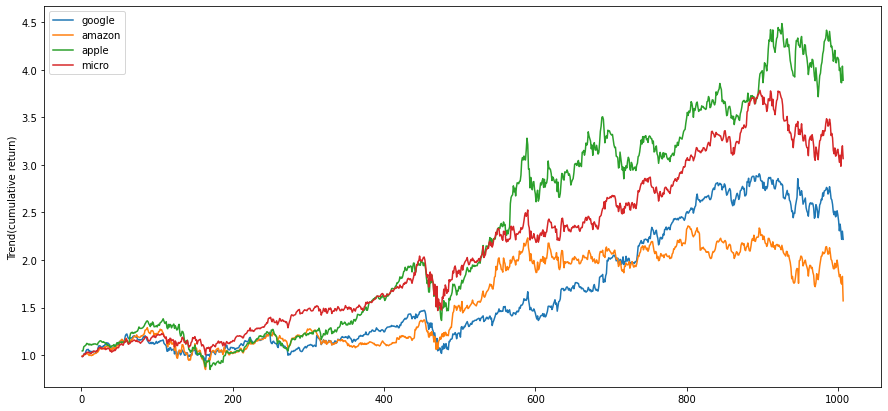

In [ ]:
google['Trend(Cum Return)'].plot(label='google',figsize=(15,7))
amazon['Trend(Cum Return)'].plot(label='amazon')
apple['Trend(Cum Return)'].plot(label='apple')
micro['Trend(Cum Return)'].plot(label='micro')
plt.legend()
plt.ylabel('Trend(cumulative return)')


In [ ]:
google['Trend(Cum Return)'].fillna("0",inplace = True)
amazon['Trend(Cum Return)'].fillna("0",inplace = True)
apple['Trend(Cum Return)'].fillna("0",inplace = True)
micro['Trend(Cum Return)'].fillna("0",inplace = True)

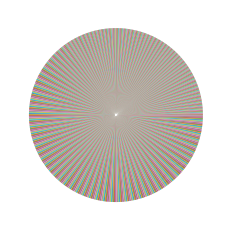

In [ ]:
plt.pie(amazon["Trend(Cum Return)"])
plt.show()

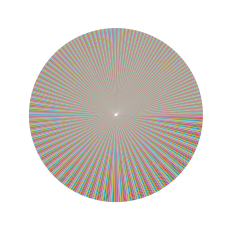

In [ ]:
plt.pie(google["Trend(Cum Return)"])
plt.show()